In [1]:
from sympy import init_printing; init_printing();
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from silkpy.surface import ParametricSurface
from sympy import symbols, sin, cos, pi, cot, Array, refine, Q
from silkpy.sympy_utility import dot
u, v = symbols('u, v', real=True)

In [3]:
surf_choice = 'torus'
if surf_choice=='cylindrical':
    R = symbols('R', positive=True)
    s = ParametricSurface([u, v], [R*cos(u), R*sin(u), v])
elif surf_choice=='cone':
    w = symbols('omega', real=True)
    s = ParametricSurface([u, v], [v*cos(u), v*sin(u), v*cot(w)])
elif surf_choice=='Mobius':
    theta = symbols('theta', real=True)
    s = ParametricSurface([theta, v],
        Array([cos(theta),                sin(theta),                0                ]) + 
        Array([sin(theta/2) * cos(theta), sin(theta/2) * sin(theta), cos(theta/2)]) * v)
elif surf_choice=='torus':
    from sympy import Q, ask
    from sympy.assumptions import global_assumptions
    a, r = symbols('a, r', real=True, positive=True)
#     global_assumptions.add(Q.positive(a - r))
    global_assumptions.add(Q.positive(a + r*cos(u)))
    s = ParametricSurface([u, v], [ (a+r*cos(u)) * cos(v), (a+r*cos(u)) * sin(v), r*sin(u)])

In [4]:
# from silkpy.sympy_utility import norm
# from sympy import Abs
# Abs(a + r * cos(u)).refine()
# refine( Abs(a + r * cos(u)) )


In [6]:
s.metric_tensor.tensor()
s.metric_tensor.change_config('uu').tensor()
s.christoffel_symbol.tensor()
r_u, r_v = s.expr().diff(u), s.expr().diff(v); r_u, r_v
a_, b_ = r_u, r_v
s.weingarten_matrix
if surf_choice=='torus':
    s.weingarten_matrix = s.weingarten_matrix.refine(Q.positive(a + r*cos(u)))
    s.weingarten_matrix
    

⎡ 2                 ⎤
⎢r          0       ⎥
⎢                   ⎥
⎢                  2⎥
⎣0   (a + r⋅cos(u)) ⎦

⎡1                  ⎤
⎢──         0       ⎥
⎢ 2                 ⎥
⎢r                  ⎥
⎢                   ⎥
⎢           1       ⎥
⎢0   ───────────────⎥
⎢                  2⎥
⎣    (a + r⋅cos(u)) ⎦

⎡                            ⎡                                  -r⋅(a + r⋅cos(
⎢                            ⎢              0                 ────────────────
⎢⎡0            0          ⎤  ⎢                                 2              
⎢⎢                        ⎥  ⎢                                a  + 2⋅a⋅r⋅cos(u
⎢⎢   (a + r⋅cos(u))⋅sin(u)⎥  ⎢                                                
⎢⎢0  ─────────────────────⎥  ⎢  -r⋅(a + r⋅cos(u))⋅sin(u)                      
⎢⎣             r          ⎦  ⎢──────────────────────────────                0 
⎢                            ⎢ 2                   2    2                     
⎣                            ⎣a  + 2⋅a⋅r⋅cos(u) + r ⋅cos (u)                  

u))⋅sin(u)    ⎤⎤
──────────────⎥⎥
     2    2   ⎥⎥
) + r ⋅cos (u)⎥⎥
              ⎥⎥
              ⎥⎥
              ⎥⎥
              ⎥⎥
              ⎦⎦

([-r⋅sin(u)⋅cos(v)  -r⋅sin(u)⋅sin(v)  r⋅cos(u)], [-(a + r⋅cos(u))⋅sin(v)  (a +
 r⋅cos(u))⋅cos(v)  0])

⎡1              ⎤
⎢─       0      ⎥
⎢r              ⎥
⎢               ⎥
⎢      cos(u)   ⎥
⎢0  ────────────⎥
⎣   a + r⋅cos(u)⎦

⎡1              ⎤
⎢─       0      ⎥
⎢r              ⎥
⎢               ⎥
⎢      cos(u)   ⎥
⎢0  ────────────⎥
⎣   a + r⋅cos(u)⎦

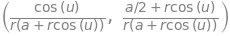

⎛⎛1                                          ⎞  ⎛   cos(u)                    
⎜⎜─, [-sin(u)⋅cos(v)  -sin(u)⋅sin(v)  cos(u)]⎟, ⎜────────────, [-sin(v)  cos(v
⎝⎝r                                          ⎠  ⎝a + r⋅cos(u)                 

     ⎞⎞
)  0]⎟⎟
     ⎠⎠

In [11]:
Wa = s.weingarten_transform(a_) 
Wb = s.weingarten_transform(b_)
dot(Wa, b_), dot(a_, Wb)
s.K_H
s.prin_curvature_and_vector

In [10]:
s.prin_curvature_and_vector

⎛⎛1                                          ⎞  ⎛   cos(u)                    
⎜⎜─, [-sin(u)⋅cos(v)  -sin(u)⋅sin(v)  cos(u)]⎟, ⎜────────────, [-sin(v)  cos(v
⎝⎝r                                          ⎠  ⎝a + r⋅cos(u)                 

     ⎞⎞
)  0]⎟⎟
     ⎠⎠

In [53]:
s.weingarten_matrix

⎡1              ⎤
⎢─       0      ⎥
⎢r              ⎥
⎢               ⎥
⎢      cos(u)   ⎥
⎢0  ────────────⎥
⎣   a + r⋅cos(u)⎦

In [32]:
from silkpy.surface.draw import draw_surface_plotly

if surf_choice=='cylindrical':
    R = 1.0
    s = ParametricSurface([u, v], [R*cos(u), R*sin(u), v])
elif surf_choice=='cone':
    w = float(pi) / 4
    s = ParametricSurface([u, v], [v*cos(u), v*sin(u), v*cot(w)] )
    draw_surface_plotly(s, domain=[(-2*float(pi), 2*float(pi)), (4, 6)])
elif surf_choice=='torus':
    draw_surface_plotly(s.subs({a: 5, r:2}), domain=[(-float(pi), float(pi)), (-float(pi), float(pi))])

In [68]:
def curvature_curve(surface):
    from sympy import Matrix, Array, Eq
    from sympy import Function, symbols
    import sympy.solvers.ode as ode
    t = symbols('t', real=True)
    # u1, u2 = symbols('u1, u2', real=True, cls=Function)
    u1 = Function(surface.sym(0), real=True)(t)
    u2 = Function(surface.sym(1), real=True)(t)
    curvature_curve_mat = Matrix([
        [u1.diff(t)**2, -u1.diff(t) * u2.diff(t), u2.diff(t)**2], 
        Array(surface.E_F_G).subs(surface.sym(0), u1), 
        Array(surface.L_M_N).subs(surface.sym(1), u2)])
    # typically there would be two solutions
    sol_with_u1_equal_t = ode.systems.dsolve_system(
        [Eq(curvature_curve_mat.det(), 0 ), Eq(u1.diff(t), 1)])[0]
    sol_with_u2_equal_t = ode.systems.dsolve_system(
        [Eq(curvature_curve_mat.det(), 0 ), Eq(u2.diff(t), 1)])[0]
    return [sol_with_u1_equal_t, sol_with_u2_equal_t]

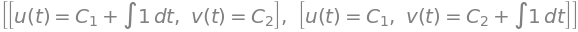

In [69]:
curvature_curve(s)

In [ ]:
dsolve(curv_eq, [Function(surface.sym(0), real=True)(t))

In [ ]:
.refine()